In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import scipy
import numpy as np
from fitters import *
from tools import *
from plots import *
from trainer import *
from results import Results
set_seaborn()

In [4]:
resPH, stimPH = read_lmc('PHOTO')
res3, stim3 = read_lmc('LMC-BG3')
res4, stim4 = read_lmc('LMC-BG4')
res5, stim5 = read_lmc('LMC-BG5')
res6, stim6 = read_lmc('LMC-BG6')

TIME = 1.0
all_results = []

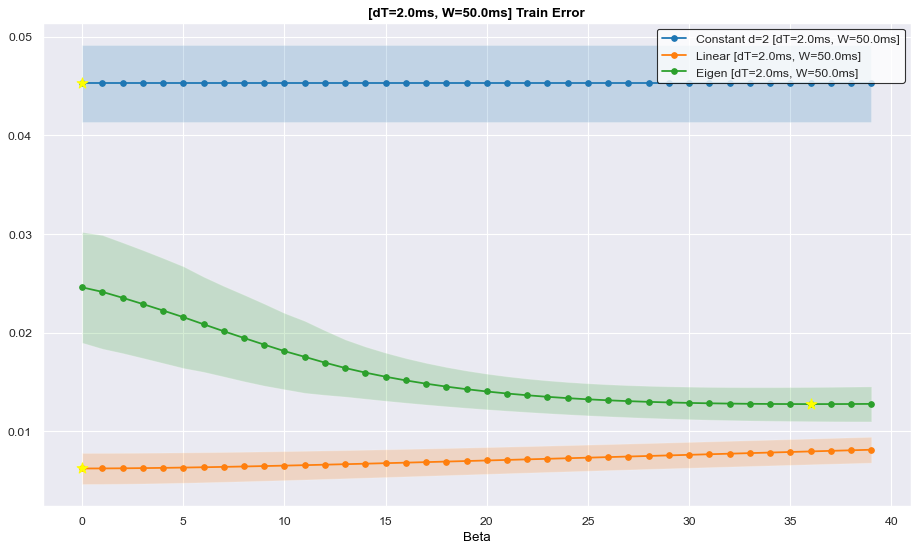

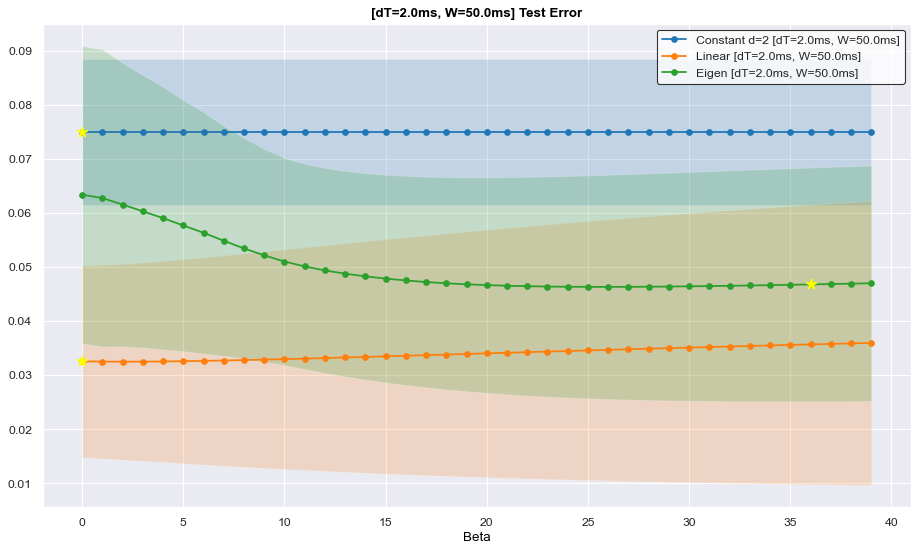

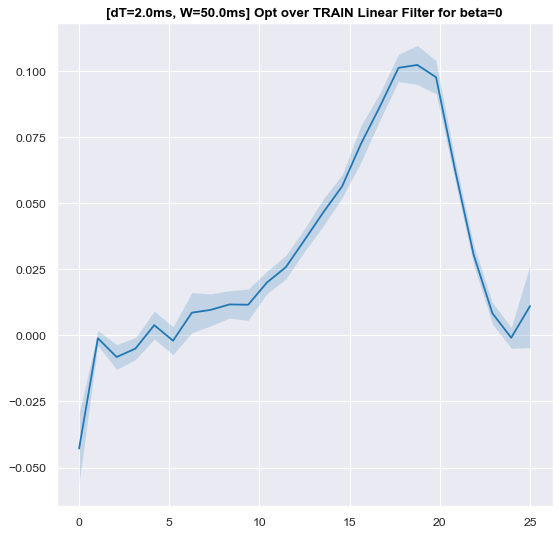

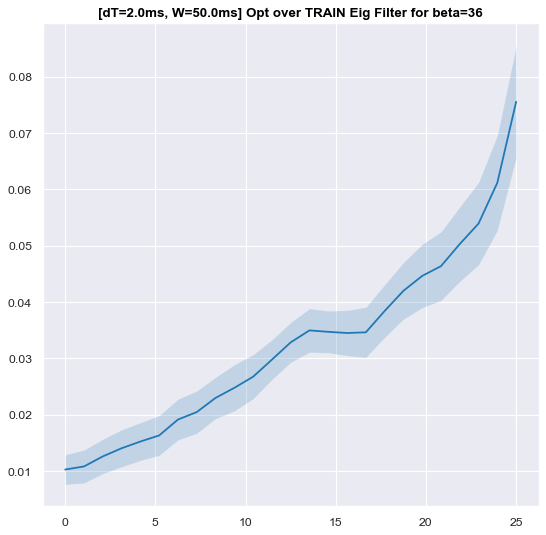

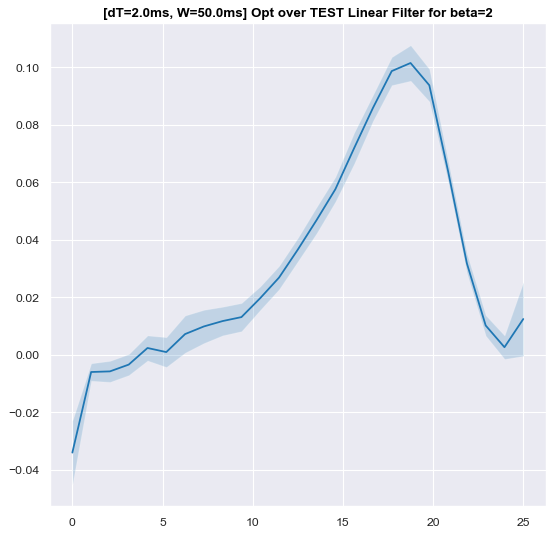

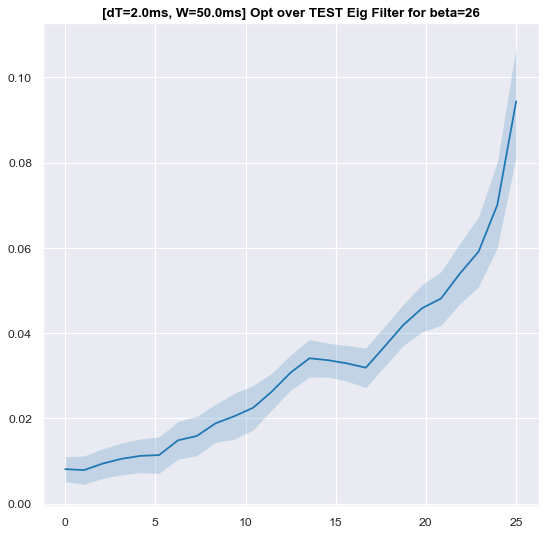

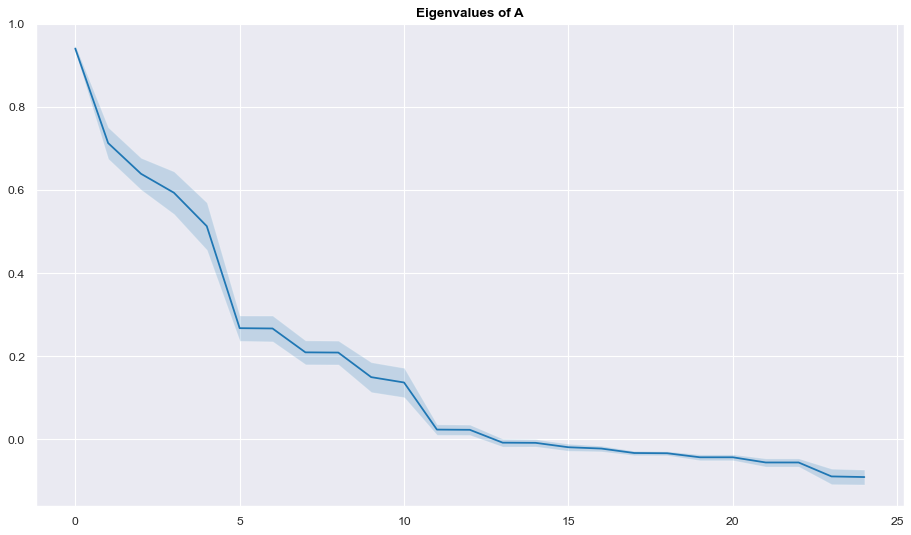

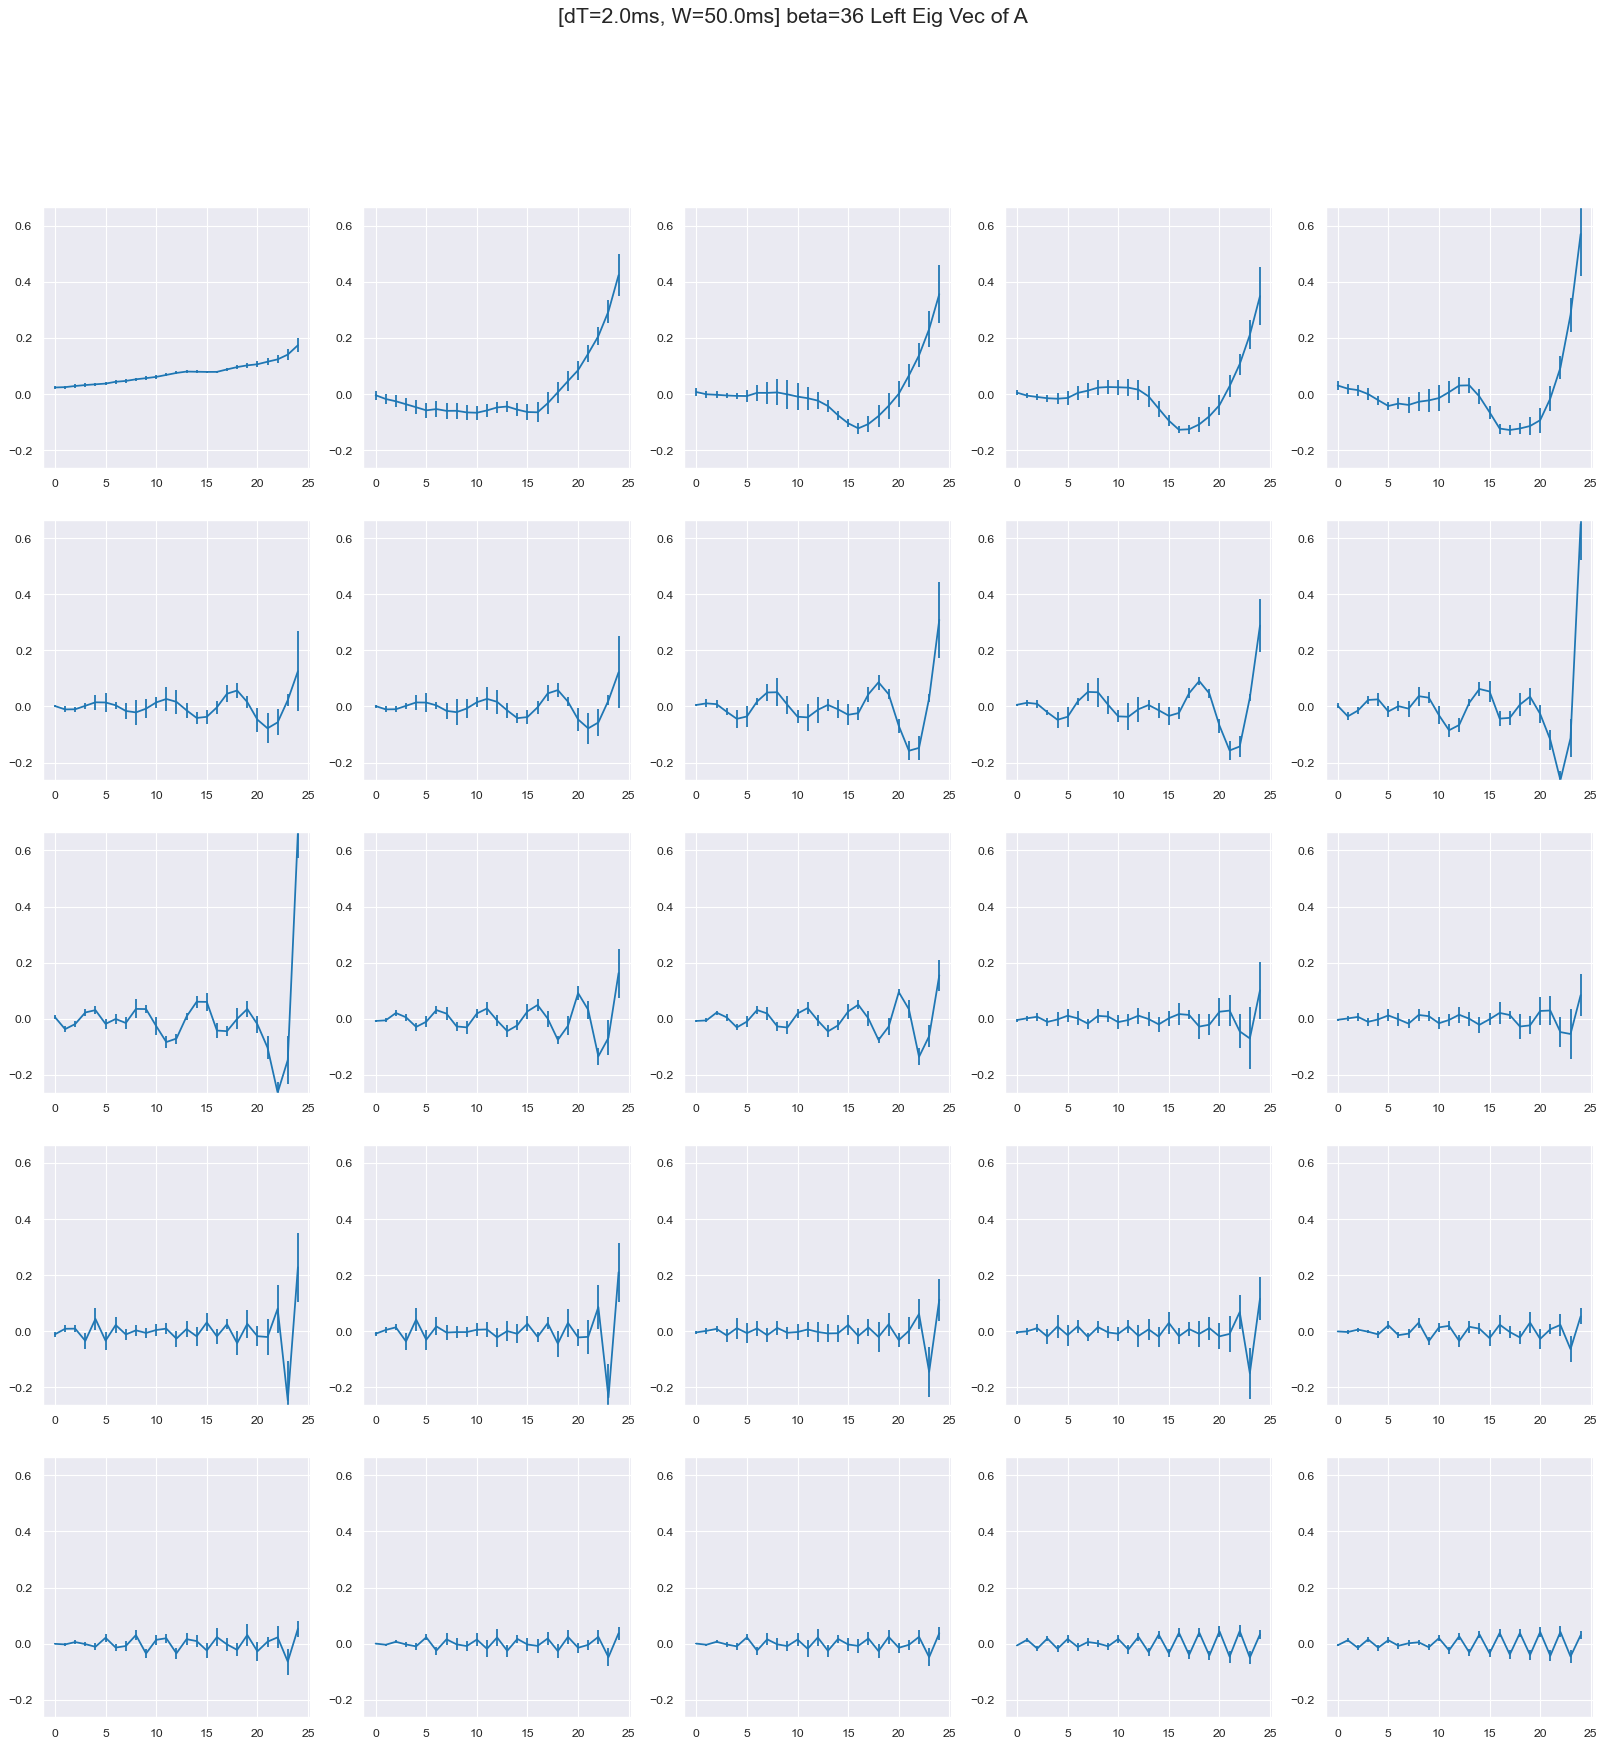

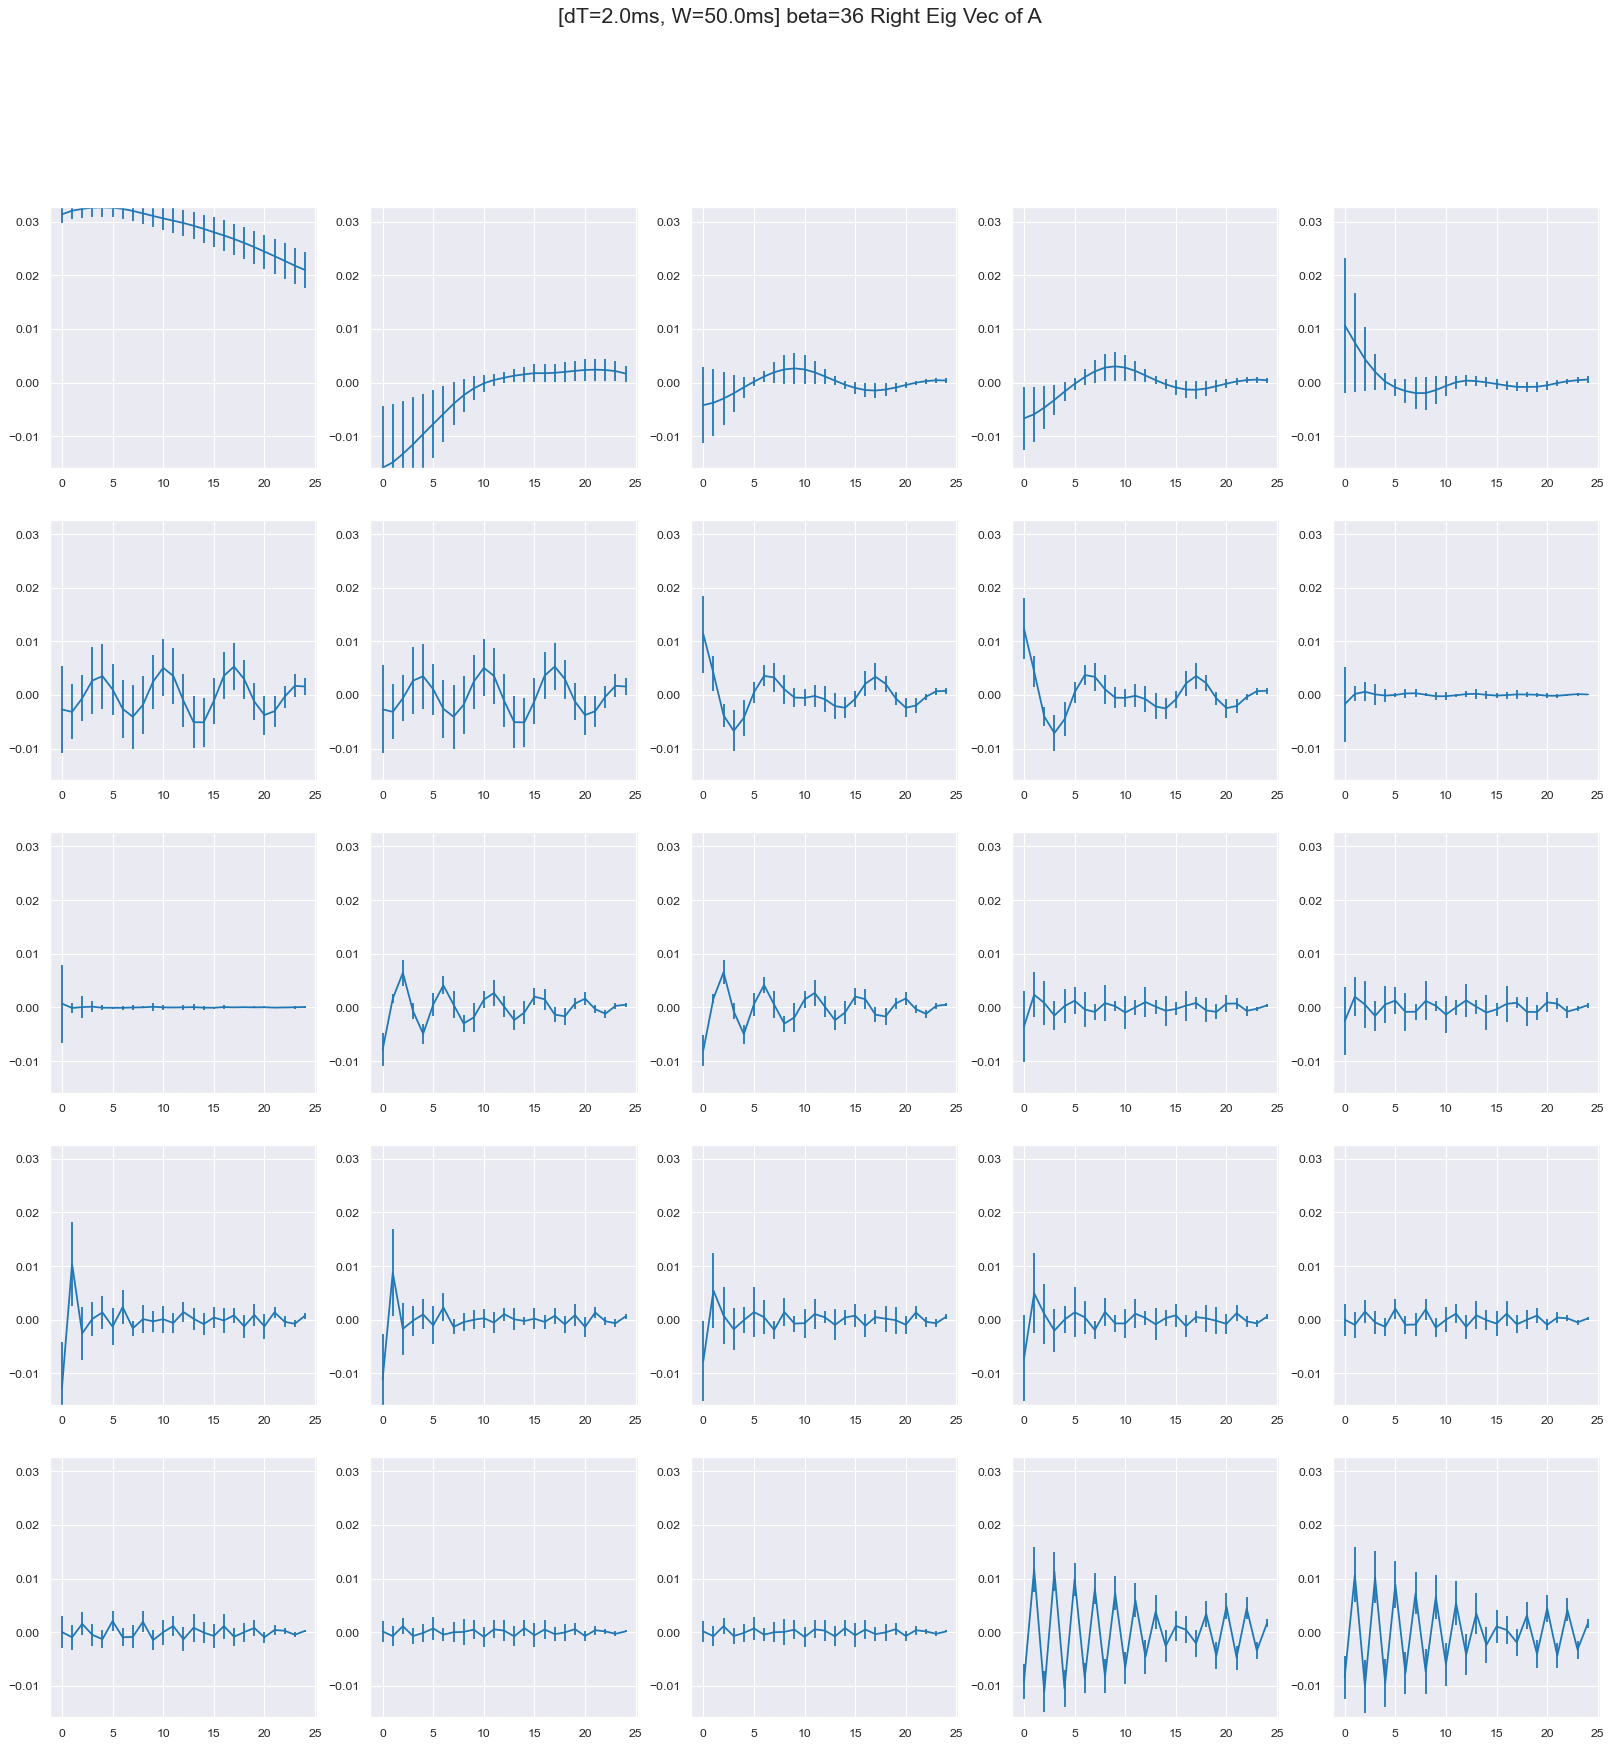

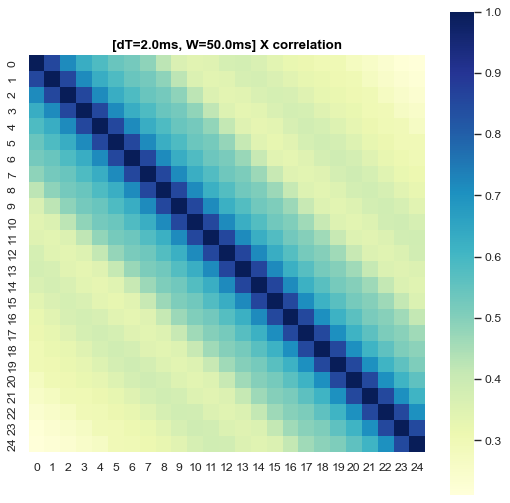

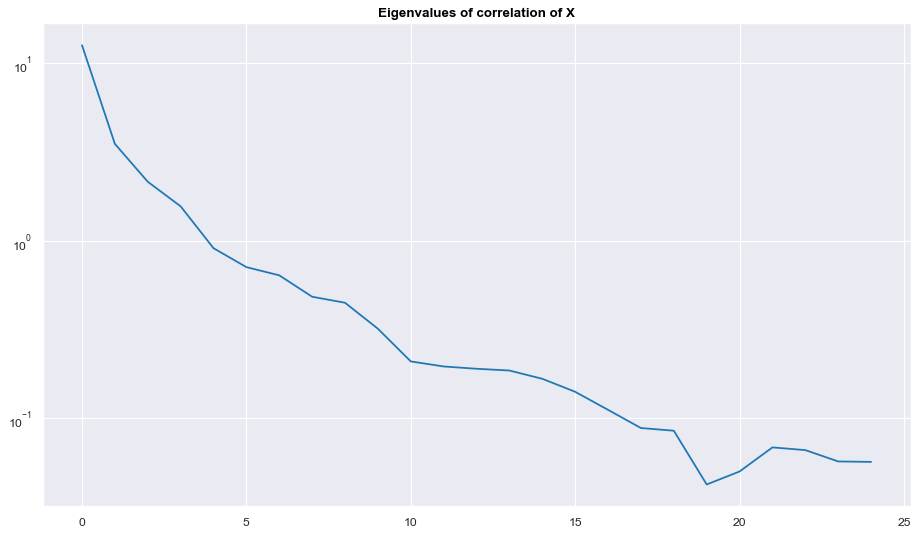

In [7]:
data = 'STIM-PHOTO'
d_method = 'mean'
factor = 20
dim = 25
betas = np.arange(0,40,1)
X = preprocess(stimPH, factor=factor, method=d_method)
Y = preprocess(resPH, factor=factor, method=d_method) 
time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plot_beta_errs(cur_results, title=title)
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
plot_self_corr(X, dim, title=title)

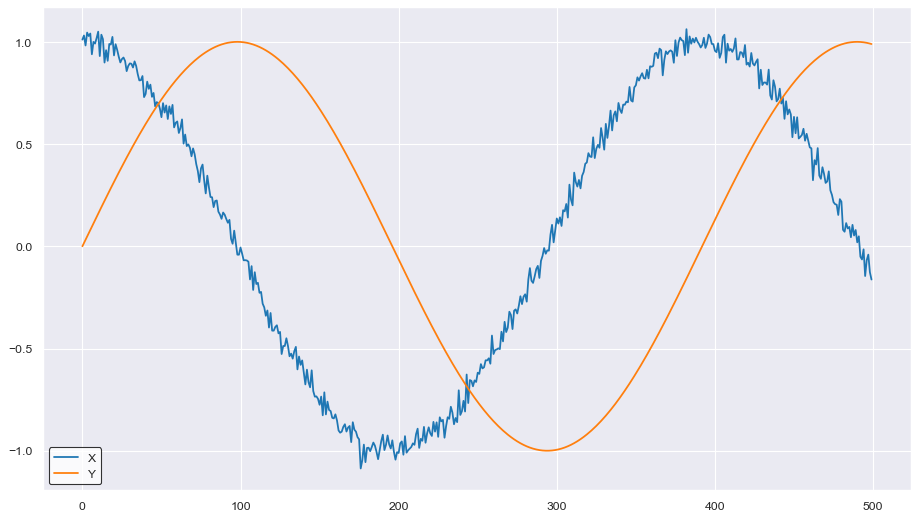

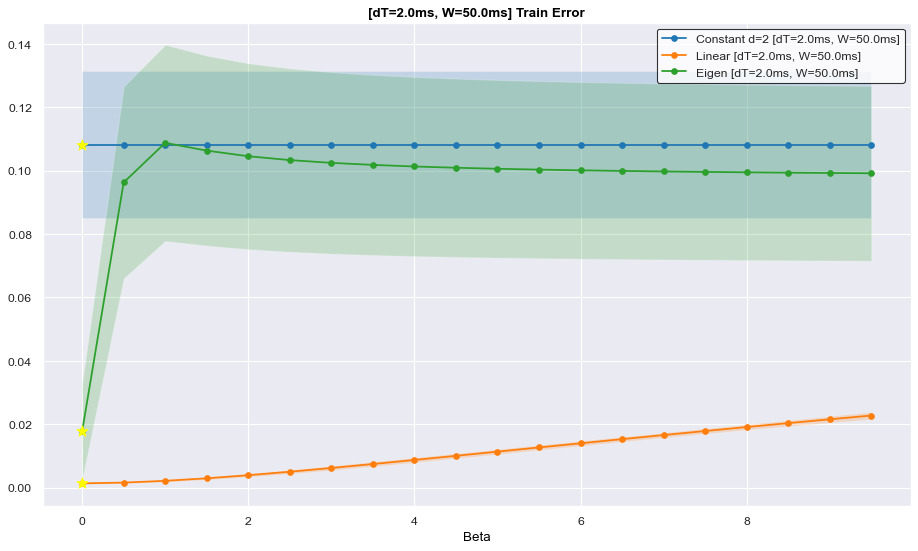

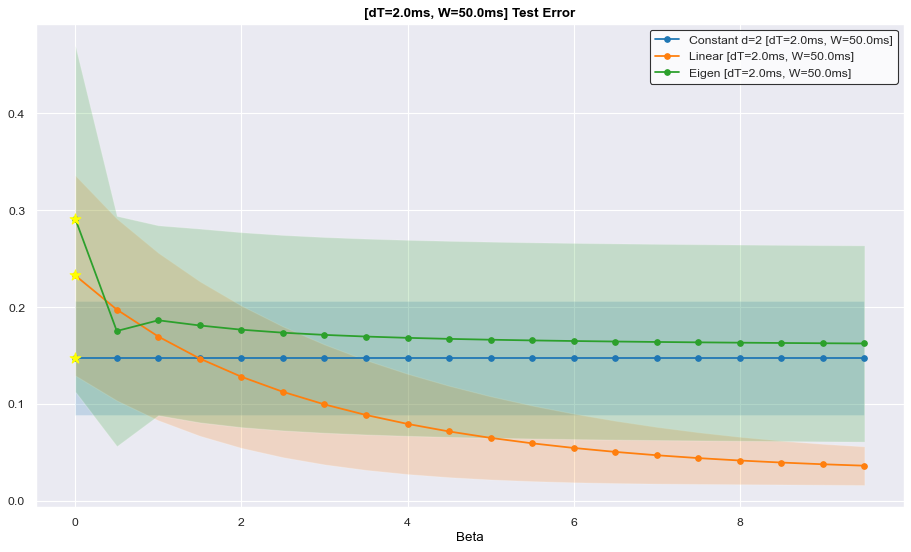

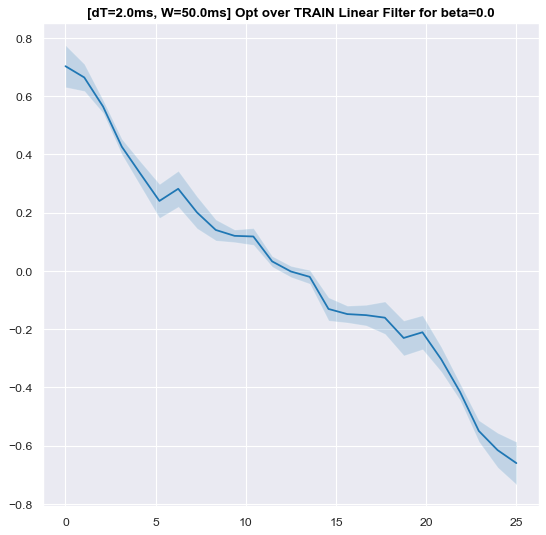

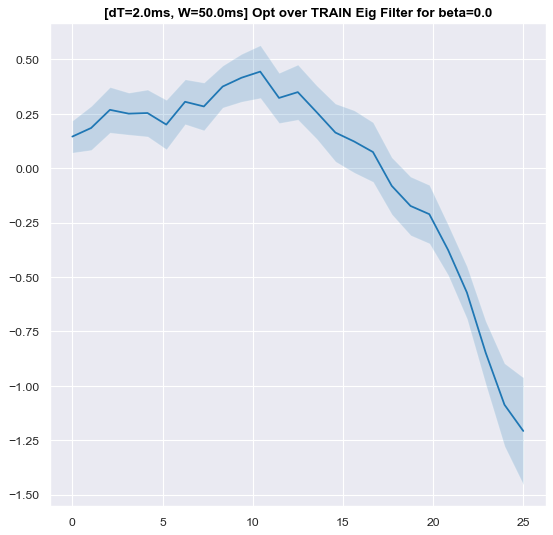

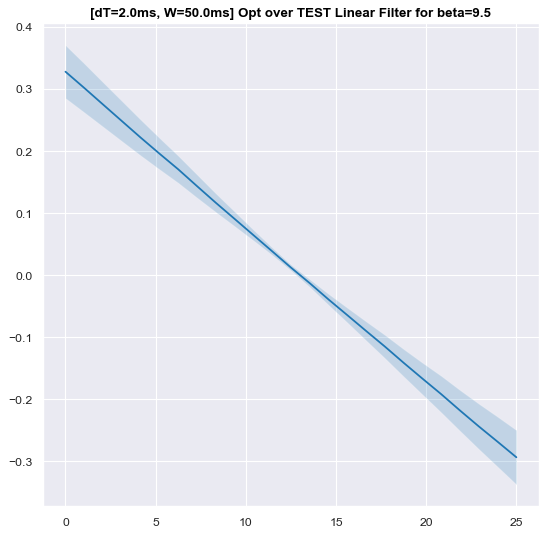

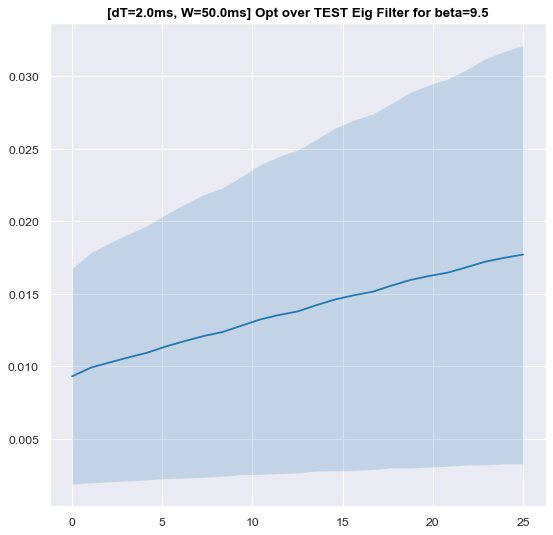

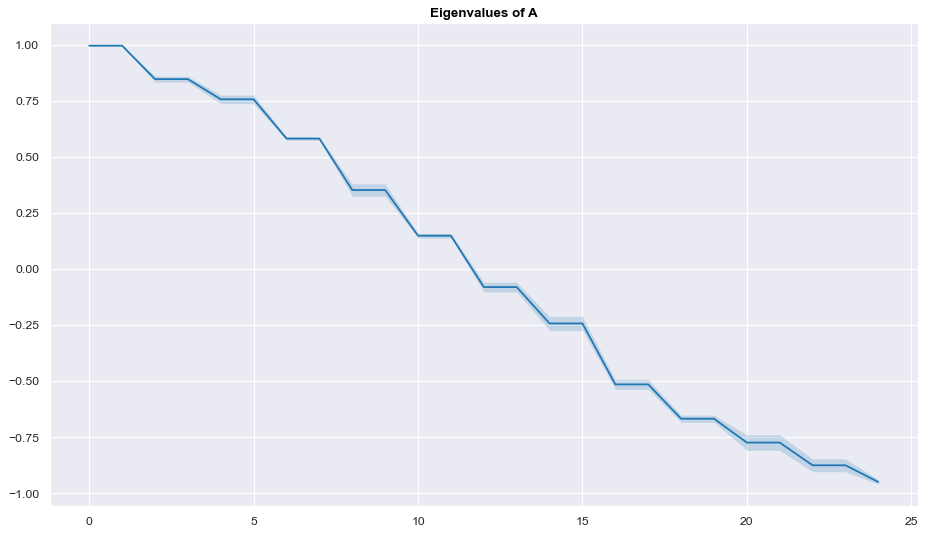

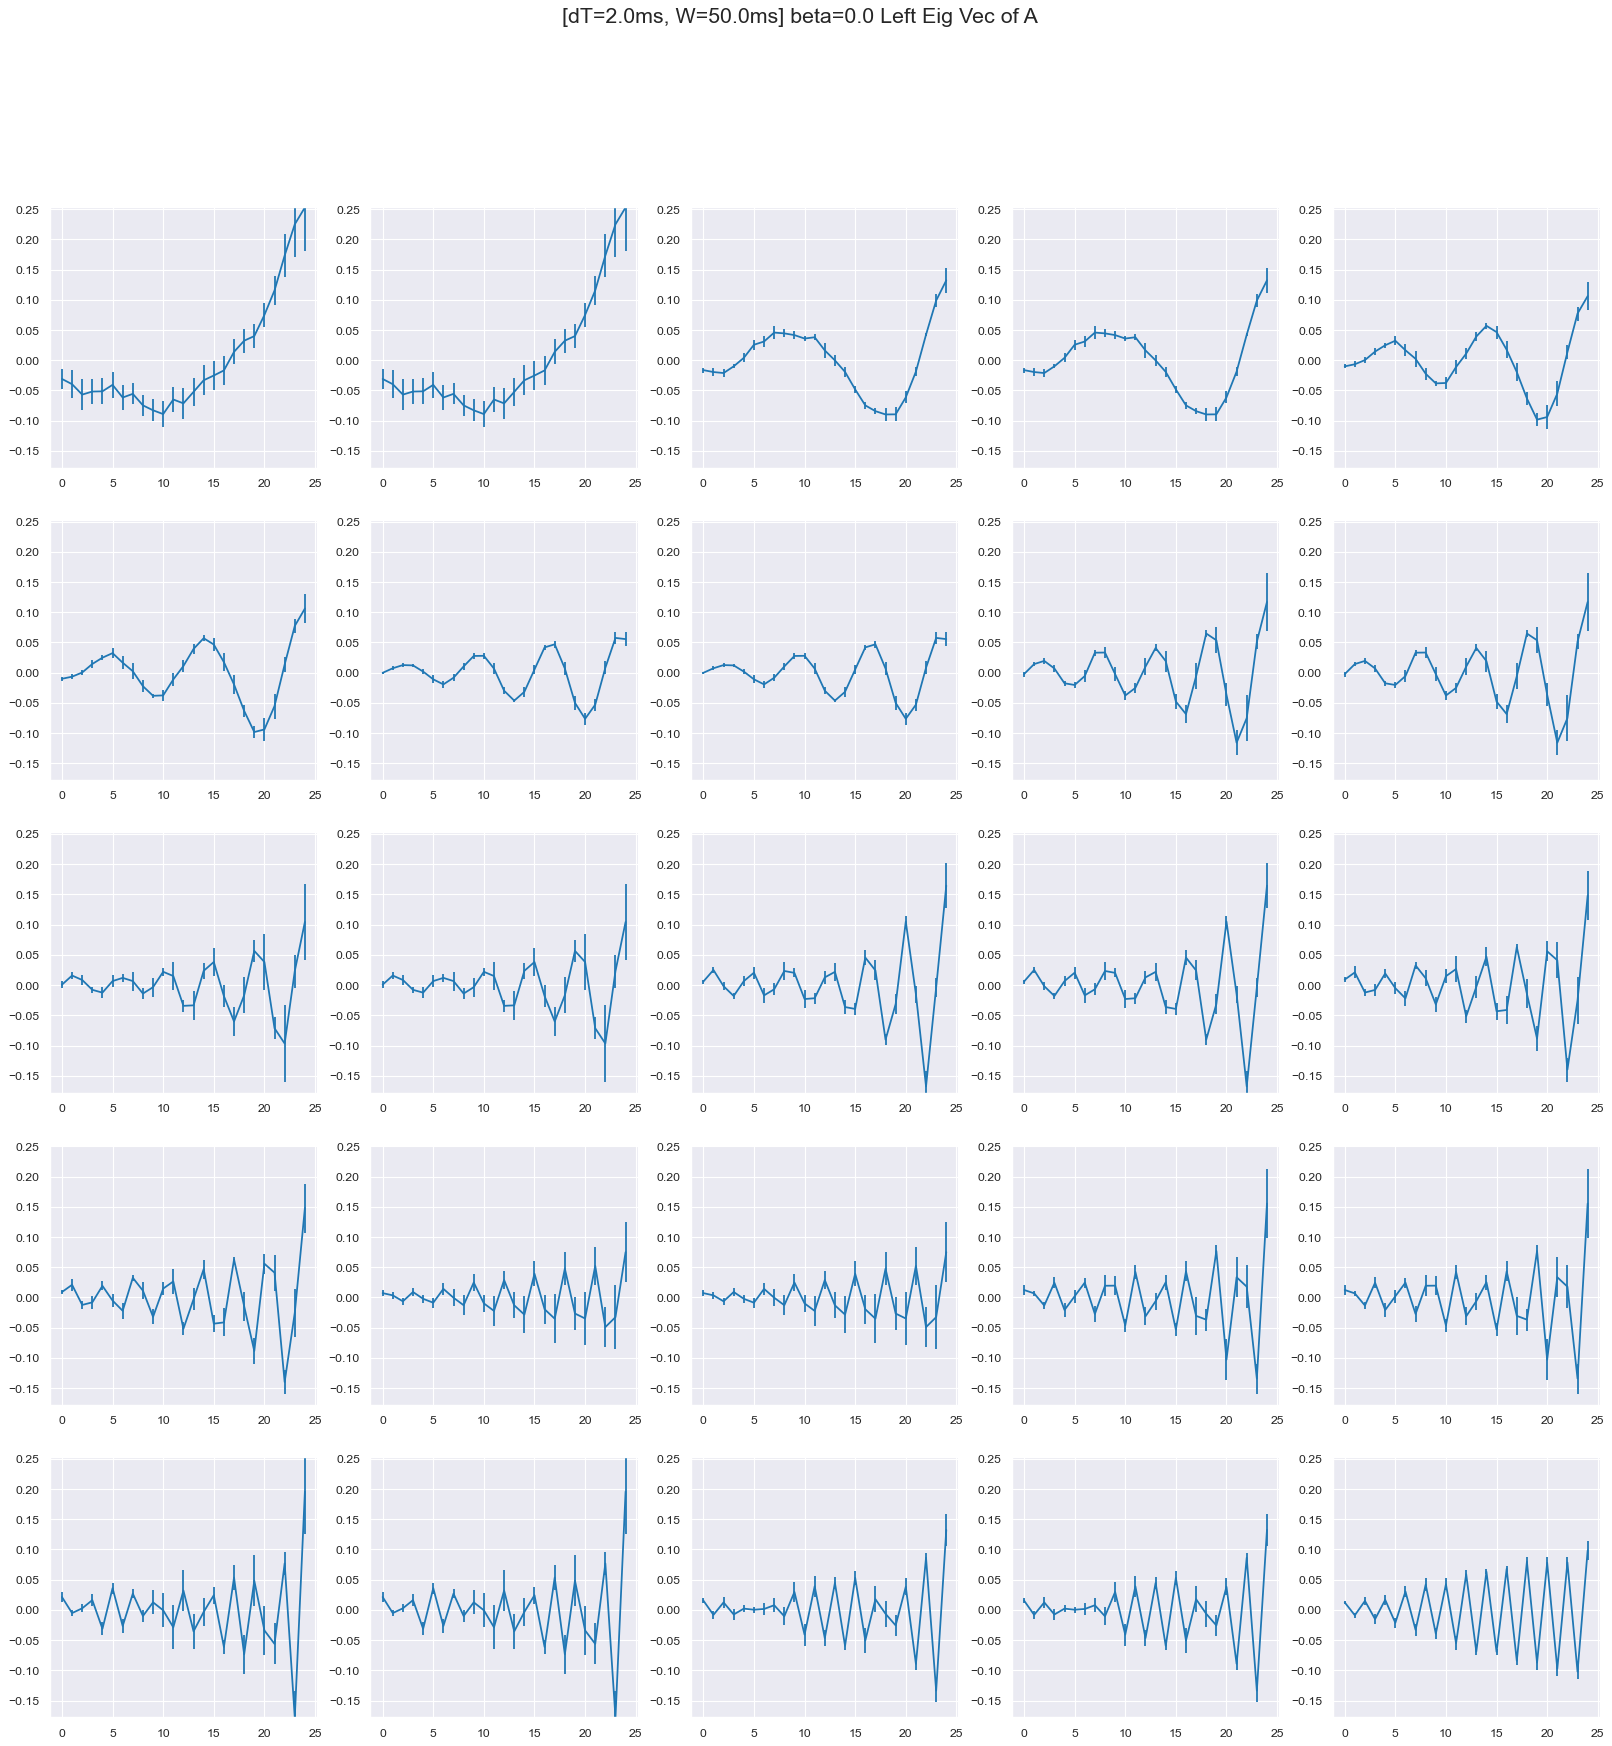

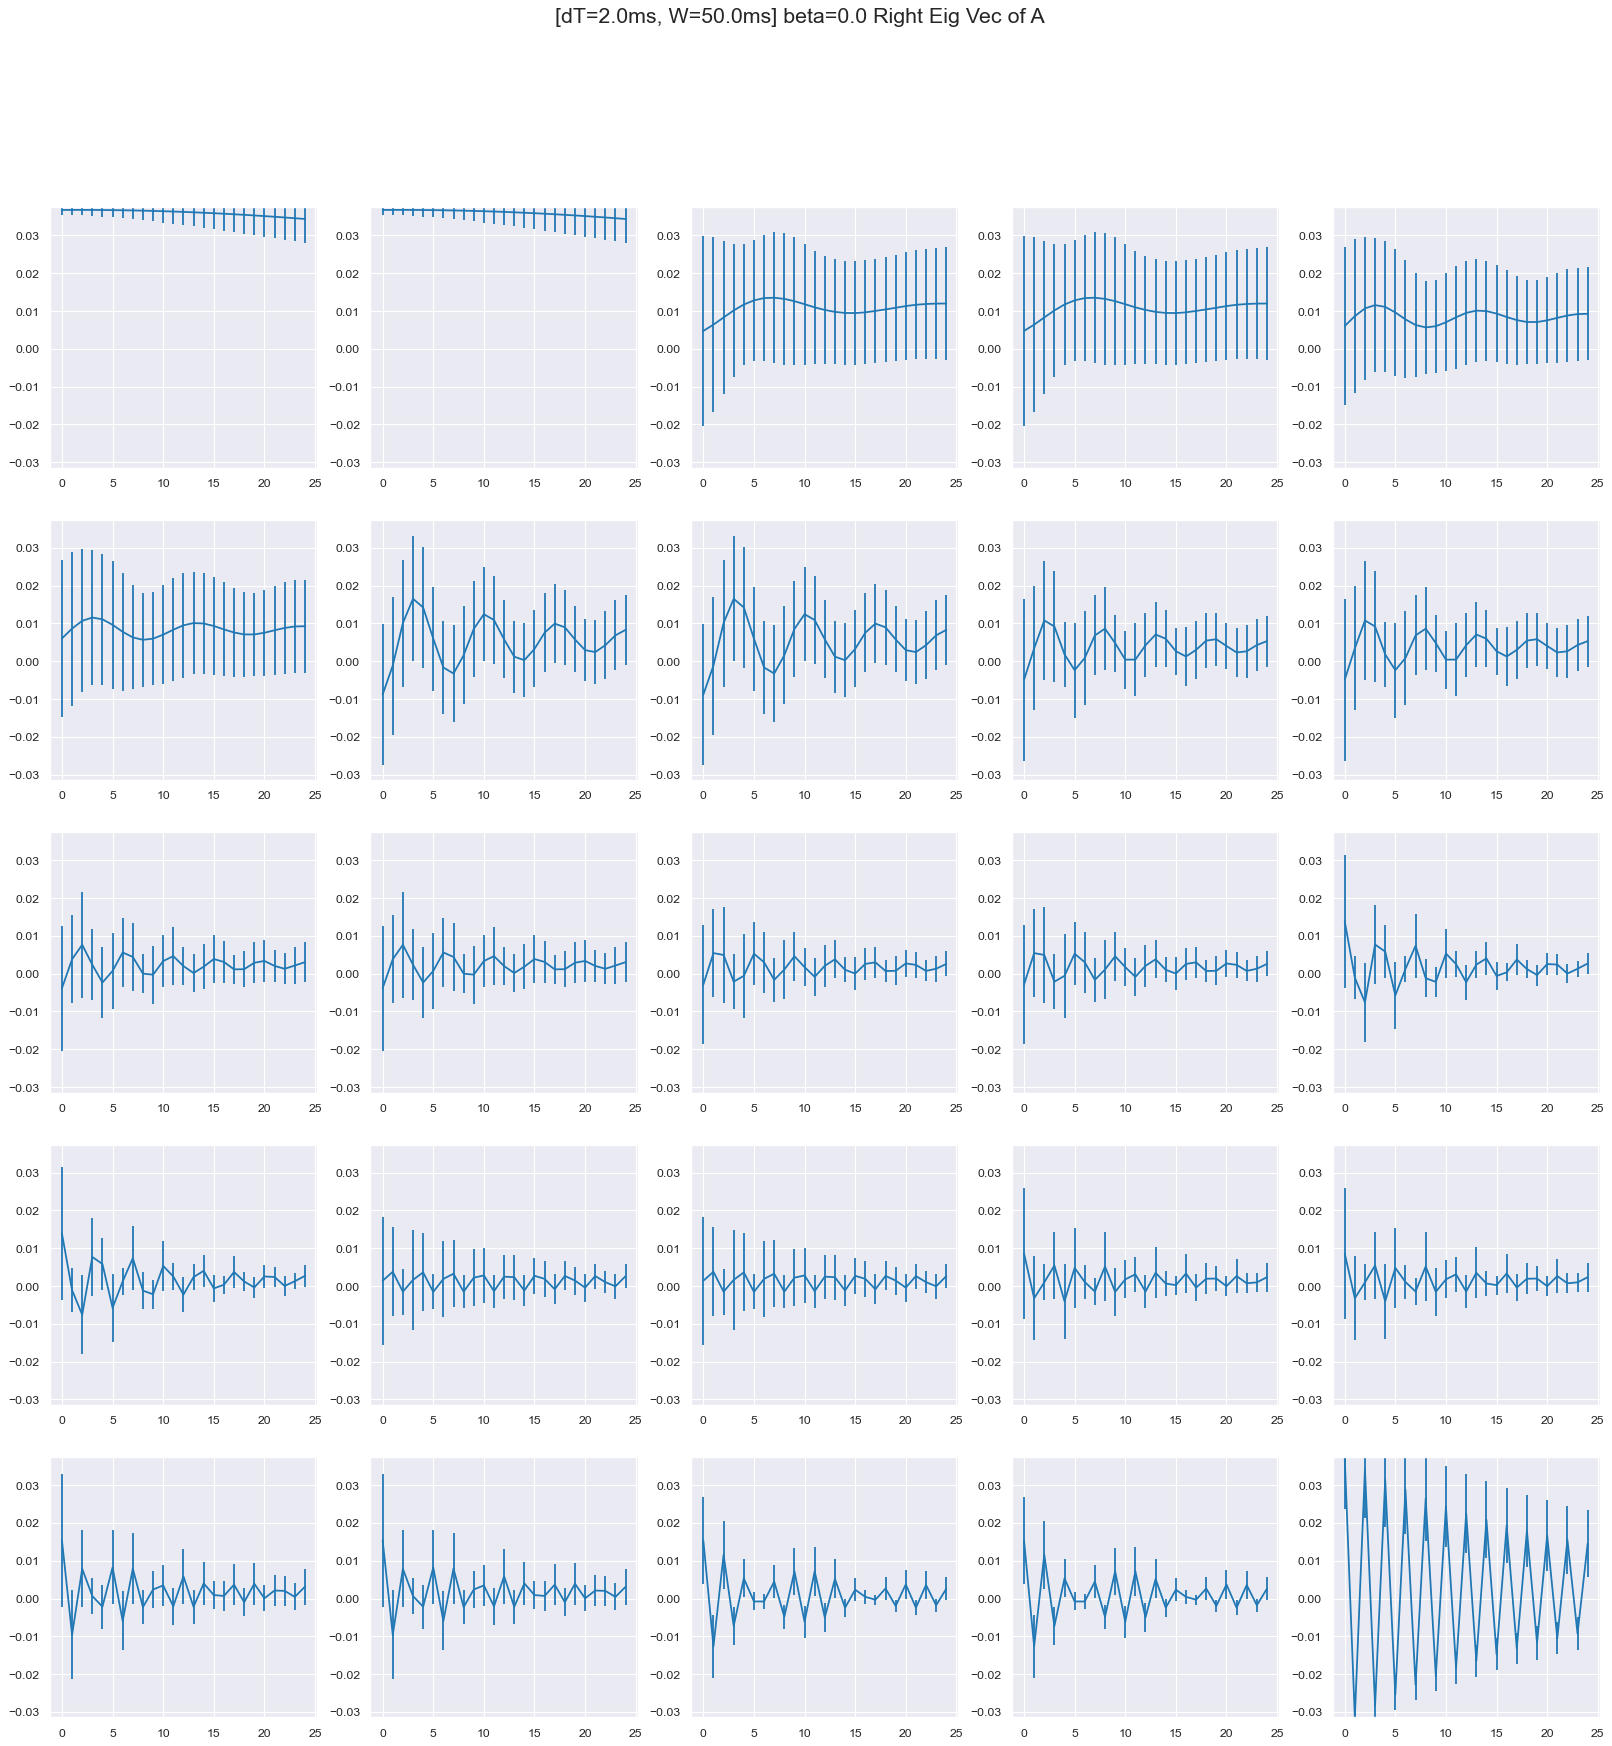

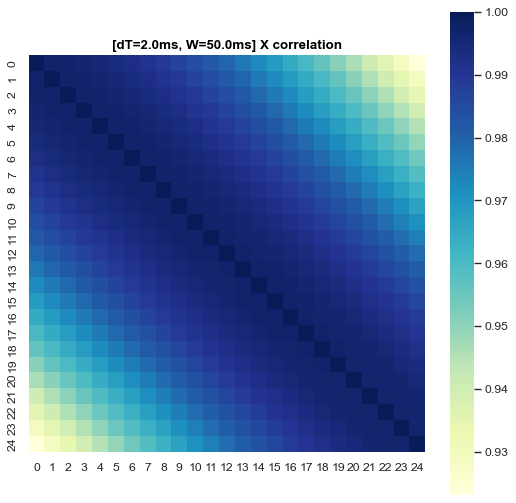

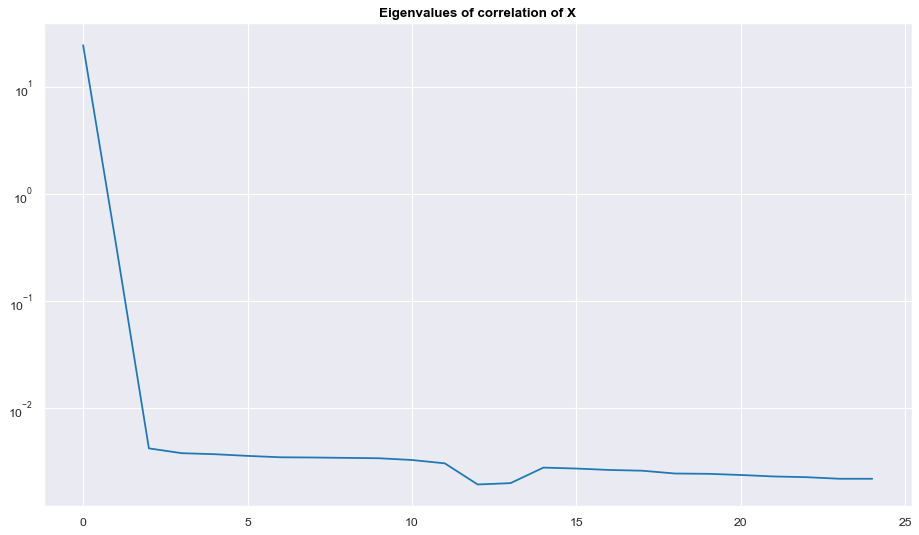

In [13]:
data = 'SIN-COS'
d_method = 'mean'
factor = 20
dim = 25
betas = np.arange(0,10,0.5)
t = np.linspace(0,8,10000//factor)
noise = 0.2
X = np.cos(t) + noise * np.random.normal(size=len(t), scale=noise)
Y = np.sin(t)
time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plt.plot(X, label='X'); plt.plot(Y, label='Y'); plt.legend(); plt.show()
plot_beta_errs(cur_results, title=title)
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
plot_self_corr(X, dim, title=title)

In [19]:
t = np.linspace(0,8,10000//factor)
sig, basis = build_signal_grid(t, 4, a=[1,1], lam=[1,1], noise=noise, return_basis=True, center=False)


(500,)
500


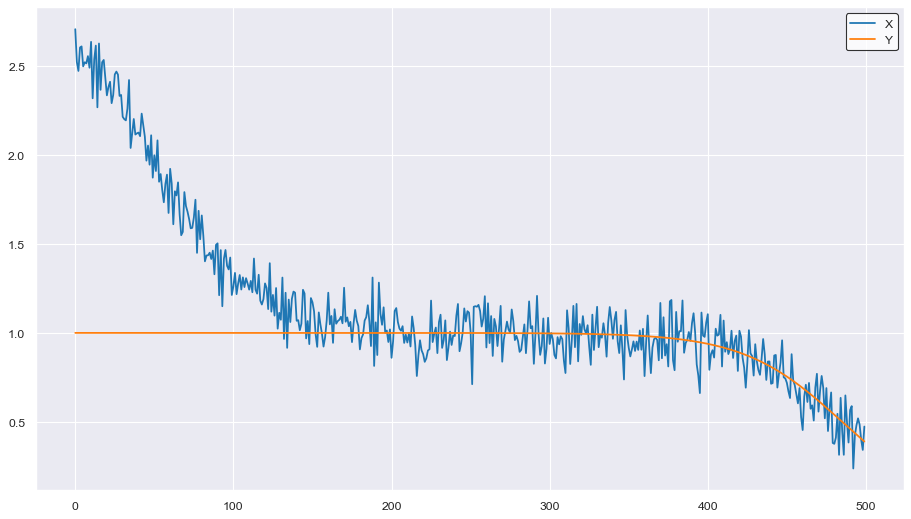

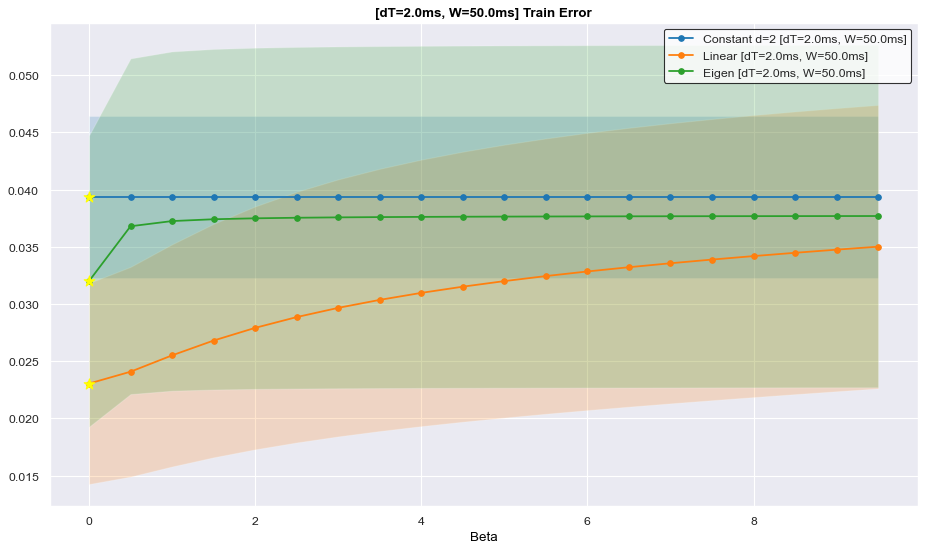

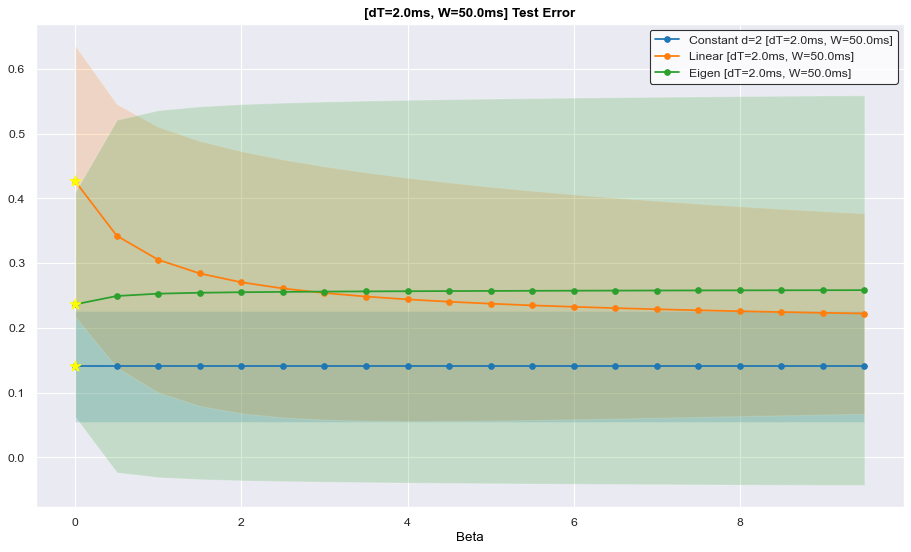

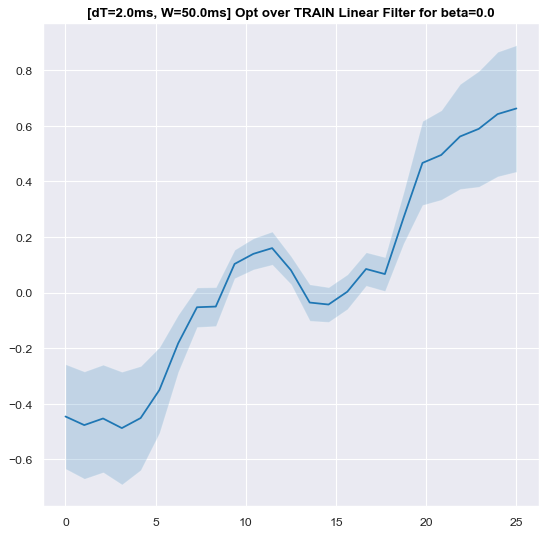

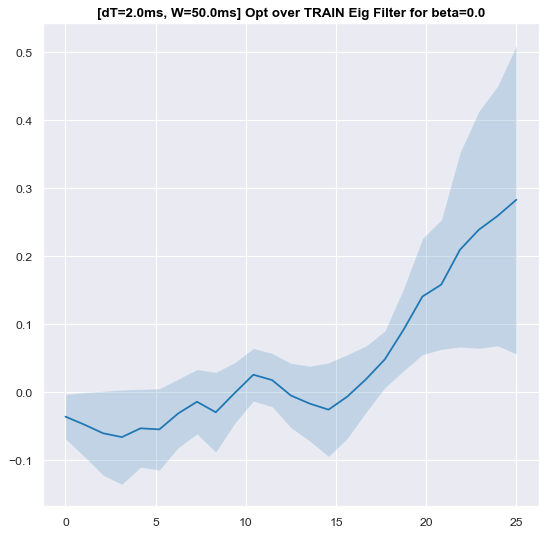

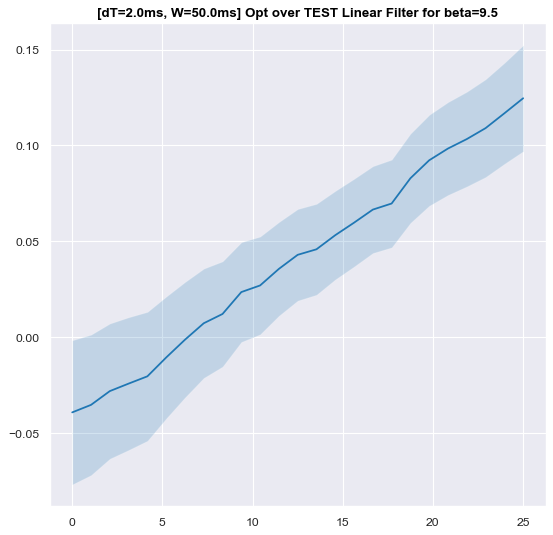

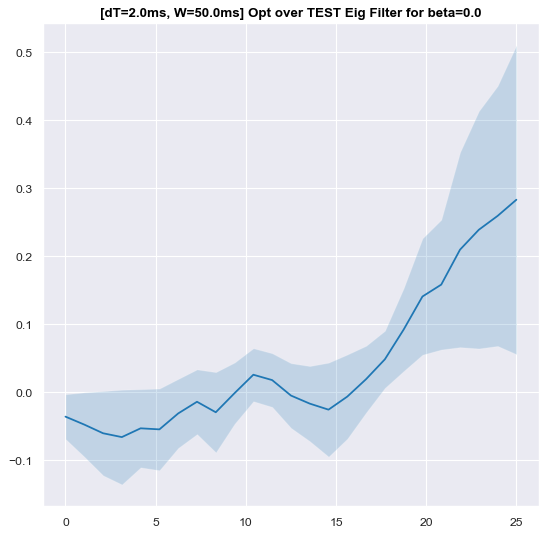

In [29]:
data = 'SIN-COS'
d_method = 'mean'
factor = 20
dim = 25
betas = np.arange(0,10,0.5)
t = np.linspace(-8,8,10000//factor)
noise = 0.1
sig, basis = build_signal_grid(t, 3, a=[1,1], lam=[1,1], noise=noise, return_basis=True, center=False)
X = sig + noise * np.random.normal(size=len(t), scale=noise)
Y = basis[-1]

time_window = round( dim*(TIME/len(X))*1000, 3)
dT = 1/len(X)*1000
time_str = f'dT={dT}ms, W={time_window}ms'
title = f'[{time_str}]'


model = ConstantModel(f'Constant d=2 {title}')
res = train_test_method(X, Y, model, 2, betas=betas)
C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

model = EigenModel(f'Eigen {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Eig50_Results = Results(model.name, *res)

cur_results = [C2_Results, Lin50_Results, Eig50_Results]
all_results.extend(cur_results)

# plotting
plt.plot(X, label='X'); plt.plot(Y, label='Y'); plt.legend(); plt.show()
plot_beta_errs(cur_results, title=title)
plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
# plot_spectrum(Eig50_Results.get_avg_spectrum(), title=f'{title} beta={round(Eig50_Results.get_opt_beta(),3)}')
# plot_self_corr(X, dim, title=title)